In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [2]:
import torch

Text(0.5, 1.0, '$y = a * b^x$')

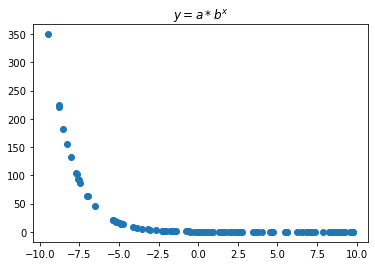

In [3]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

def funct(a, b, x):
  return a * torch.pow(b, x)

a = 0.5
b = 0.5

y_train = funct(a, b, x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = a * b^x$')

Text(0.5, 1.0, 'Gaussian noise')

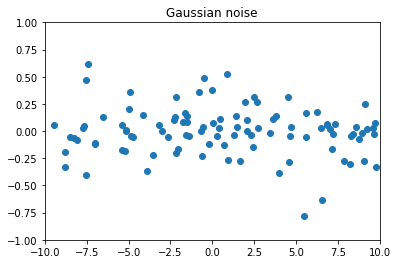

In [4]:
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

Text(0, 0.5, 'y_train')

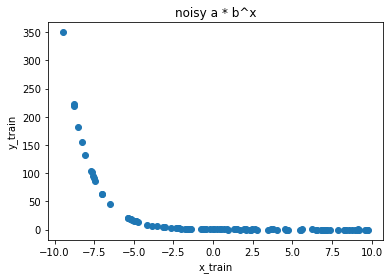

In [5]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy a * b^x')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [6]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[-2.9504e-02],
        [ 6.1409e-02],
        [ 7.2456e-02],
        [ 2.0472e+01],
        [-2.2016e-02],
        [ 2.9203e-02],
        [ 1.5797e+01],
        [-1.1722e-01],
        [ 1.2744e+00],
        [ 9.4706e+01],
        [-1.5989e-02],
        [ 4.0110e-01],
        [ 2.1416e-01],
        [ 1.3493e+01],
        [-7.6964e-01],
        [ 3.4965e+02],
        [-6.8662e-03],
        [ 4.5607e+00],
        [ 1.4477e+01],
        [ 7.0535e-02],
        [ 5.5844e+00],
        [ 1.7993e-01],
        [ 2.2344e+02],
        [ 3.5795e-02],
        [ 1.2179e+00],
        [ 5.6074e-01],
        [ 1.7670e+00],
        [ 7.0023e+00],
        [-2.9838e-01],
        [ 4.6946e-01],
        [ 1.8175e+02],
        [ 1.7479e+01],
        [ 2.2443e-02],
        [ 1.8983e+00],
        [ 2.4231e+00],
        [ 2.5660e+00],
        [-4.3896e-02],
        [ 1.8131e+01],
        [ 2.0219e-02],
        [ 7.9121e-01],
        [ 3.1999e-01],
        [ 4.0188e-01],
        [ 1.5680e+00],
        [ 3

In [7]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


Text(0, 0.5, 'y_validation')

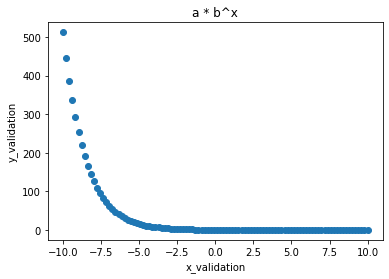

In [8]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = funct(a, b, x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('a * b^x')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [9]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[5.1200e+02],
        [4.4510e+02],
        [3.8694e+02],
        [3.3638e+02],
        [2.9242e+02],
        [2.5421e+02],
        [2.2100e+02],
        [1.9212e+02],
        [1.6702e+02],
        [1.4519e+02],
        [1.2622e+02],
        [1.0973e+02],
        [9.5389e+01],
        [8.2925e+01],
        [7.2090e+01],
        [6.2670e+01],
        [5.4481e+01],
        [4.7362e+01],
        [4.1173e+01],
        [3.5793e+01],
        [3.1116e+01],
        [2.7050e+01],
        [2.3516e+01],
        [2.0443e+01],
        [1.7772e+01],
        [1.5450e+01],
        [1.3431e+01],
        [1.1676e+01],
        [1.0150e+01],
        [8.8239e+00],
        [7.6709e+00],
        [6.6686e+00],
        [5.7972e+00],
        [5.0397e+00],
        [4.3812e+00],
        [3.8087e+00],
        [3.3110e+00],
        [2.8784e+00],
        [2.5023e+00],
        [2.1753e+00],
        [1.8911e+00],
        [1.6440e+00],
        [1.4291e+00],
        [1.2424e+00],
        [1.0801e+00],
        [9

In [10]:
class NeuralNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(NeuralNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = NeuralNet(100)

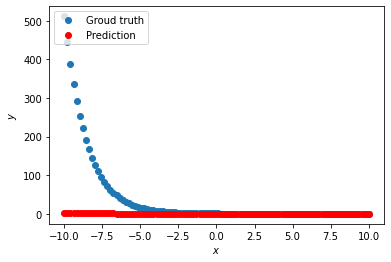

In [11]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [12]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [13]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

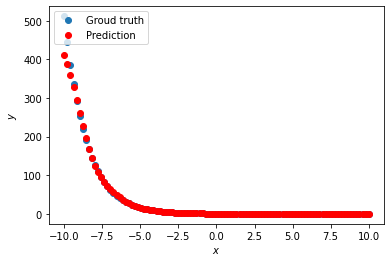

In [15]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

In [ ]:
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
      super(RegressionNet, self).__init__()
      self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
      self.act1 = torch.nn.Sigmoid()
      self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
      x = self.fc1(x)
      x = self.act1(x)
      x = self.fc2(x)
      return x

net = RegressionNet(20)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.02)

def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_value = loss(y_pred, y_train)
    
    loss_value.backward()
    optimizer.step()

# Проверка осуществляется вызовом кода:
def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())

0.018704740330576897
